# Intrinsic/Extrinsic Parameter estimation

- 학번 : 20223196
- 이름 : 이준호

---

OpenCV를 사용해 여러 장의 체스 보드 이미지에 대한 카메라의 내부/외부 파라미터를 구한다.

---

**[중요] 과제 제출 방법**
- 과제 제출 기한은 가상대학 공지사항을 참고하세요.
- 과제는 Colab에서 작성한 것을 다운받아 (파일 > 다운로드 > .ipynb 다운로드) 가상 대학에 업로드합니다. (이외의 제출 방법은 인정하지 않음)
- 제출 시 파일 제목은 '학번_이름' 으로 저장합니다.

In [308]:
import sys
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import glob

print('python', sys.version)
print('numpy', np.__version__)
print('opencv', cv.__version__)

python 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
numpy 1.22.4
opencv 4.7.0


## Google Drive와 연동하기


In [309]:
# mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [310]:
!ls '/content/drive/My Drive/Colab Notebooks/Vehicle Intelligence/img/calib/'

IMG_34.png   left02.jpg  left05.jpg  left08.jpg  left12.jpg  pattern.png
IMG_678.png  left03.jpg  left06.jpg  left09.jpg  left13.jpg
left01.jpg   left04.jpg  left07.jpg  left11.jpg  left14.jpg


In [311]:
ROOT = '/content/drive/My Drive/Colab Notebooks/Vehicle Intelligence/img/calib/'

### 이미지 불러오기

좋은 결과를 위해 최소 10장의 사진이 준비되어야 한다.

13


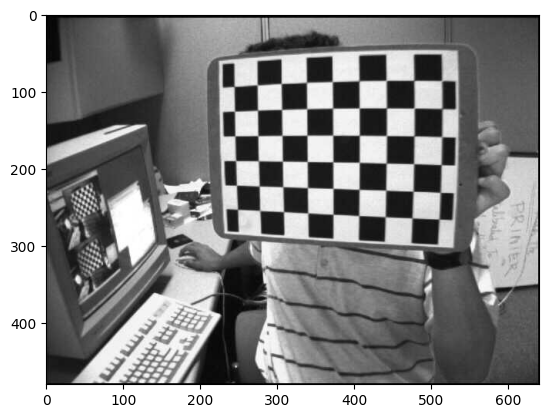

In [312]:
images = []
image_files = glob.glob(ROOT + '*.jpg')
for f in image_files :
  img = cv.imread(f)
  images.append(img)

print(len(images))
plt.imshow(images[0][:,:,::-1])

## 체스 보드 코너 찾기




관련 함수

- `	retval, corners	=	cv.findChessboardCorners(	image, patternSize[, corners[, flags]]	)`
- `corners	=	cv.cornerSubPix(	image, corners, winSize, zeroZone, criteria`
- `	image	=	cv.drawChessboardCorners(	image, patternSize, corners, patternWasFound	)`



**과제**

- 관련 함수들에 대한 입력과 출력, 파라미터를 조사해 서술한다.
- 관련 함수들을 사용하여 체스 보드의 코너를 찾는 함수 `findCorner()`를 완성한다. `findCorner()` 함수의 입력과 출력은 다음과 같다.
  - 입력 : 코너를 찾을 체스 보드의 이미지
  - 출력
    - ret : 함수의 성공 여부
    - corner_refine : `cv.cornerSubPix()`를 통해 개선된 코너점
    - corner_img : 찾은 코너와 원본 이미지를 합성한 이미지


**참고**

- 주어진 체스 보드는 9x6 grid이다.




In [313]:
w = 6
h = 9

# Prepare object points, like(0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
xval, yval = np.arange(h), np.arange(w) 
objp = np.meshgrid(xval, yval, 0.)
objp = np.concatenate(objp, axis=2)
objp = objp.reshape(-1,3)
objp = objp.astype(np.float32)


In [314]:
def findCorner(img) :
  # To-do
    patternSize = (9, 6)  
    winSize = (11, 11)  
    zeroZone = (-1, -1)  
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    ret, corners = cv.findChessboardCorners(gray, patternSize, None)

    corner_refine = cv.cornerSubPix(gray, corners, winSize, zeroZone, criteria)

    corner_img = cv.drawChessboardCorners(img, patternSize, corner_refine, ret)
    
    return ret, corner_refine, corner_img


In [315]:
# 이 부분은 수정하지 않습니다. 

objpoints = [] # 실제 세계의 3D 포인트들
imgpoints = [] # 이미지 평면 상의 2D 포인트들
corner_imgs = [] # 이미지 합성 결과를 저장


for img in images : 
  
  ret, corner, corner_img = findCorner(img)

  if ret == True :
    objpoints.append(objp)
    imgpoints.append(corner)
    corner_imgs.append(corner_img)

### 찾은 코너 시각화

13


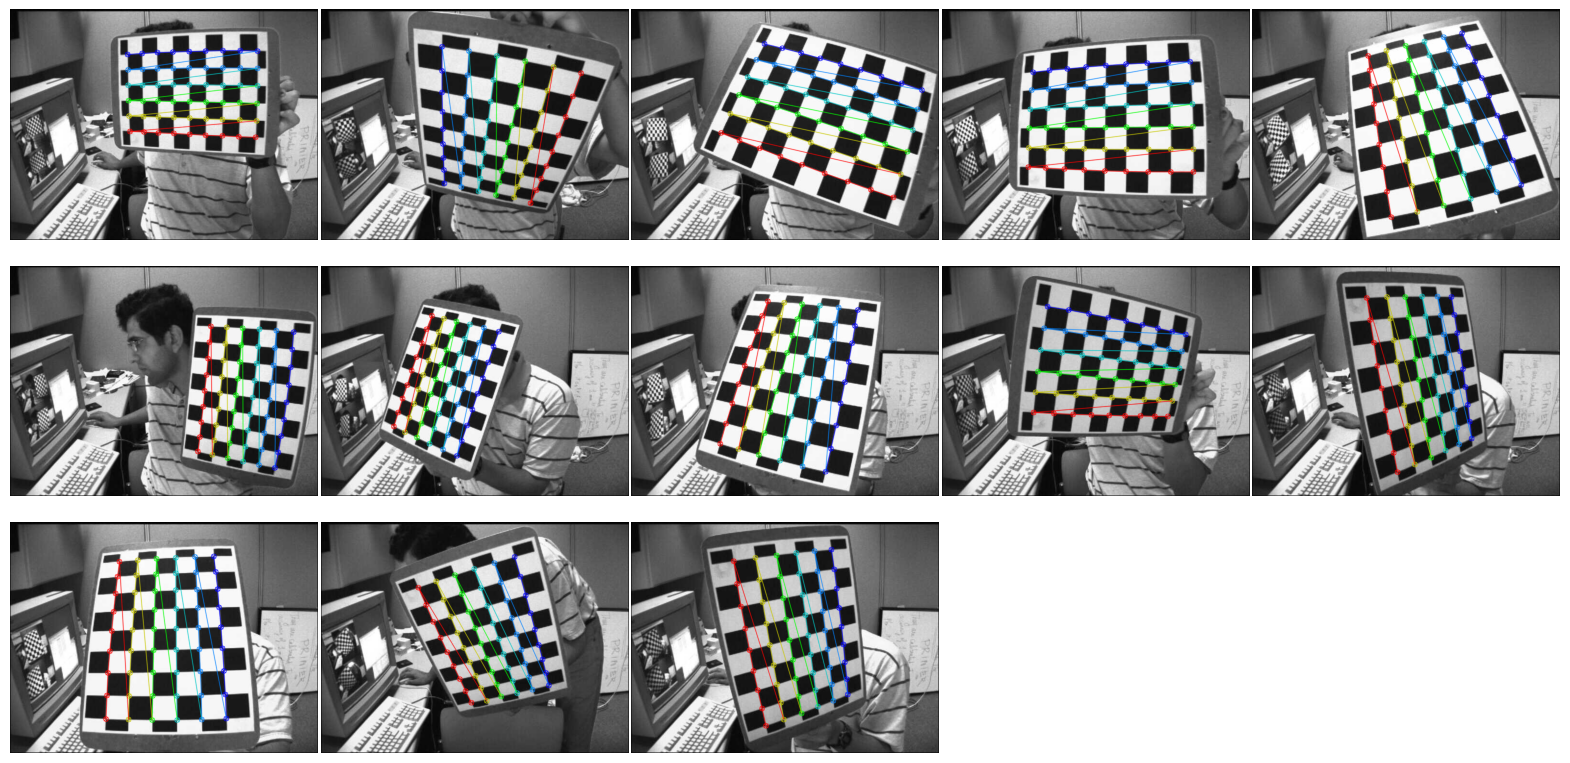

In [316]:
# 이 부분은 수정하지 않습니다. 

from matplotlib.gridspec import  GridSpec
print(len(corner_imgs))

nrows = 3
ncols = 5

fig = plt.figure(figsize = (20,10))
grid = GridSpec(nrows, ncols, wspace=0.01, hspace=0.0)

for i, img in enumerate(corner_imgs) :
  ax = plt.subplot(grid[i])
  ax.axis('off')
  ax.imshow(img)

## Calibration 

찾은 코너 포인트를 이용해 카메라의 내부/외부 파라미터를 찾는다.

**과제** 

- 카메라 매트릭스와 회전/이동 벡터들을 구한다.

관련 함수 

- `cv.calibrateCamera`

In [317]:
# To-do : cam_matrix, rotation_vectors, translation_vectors를 찾기
images = []
image_files = glob.glob(ROOT + '*.jpg')
for i in image_files :
  img = cv.imread(i)
  images.append(img)

gray = cv.cvtColor(images[0], cv.COLOR_BGR2GRAY)
ret, cam_matrix, dist, rotation_vectors, translation_vectors = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [318]:
# 이 부분은 수정하지 않습니다. 

print('camera matrix \n', cam_matrix)
print('rotation vectors \n', rotation_vectors)
print('translation vectors \n', translation_vectors)

camera matrix 
 [[536.07343019   0.         342.37038791]
 [  0.         536.01634475 235.53685635]
 [  0.           0.           1.        ]]
rotation vectors 
 (array([[0.16853568],
       [0.27575314],
       [0.01346807]]), array([[ 0.41306755],
       [ 0.64934521],
       [-1.3371948 ]]), array([[-0.27697519],
       [ 0.186891  ],
       [ 0.35483188]]), array([[-0.11082302],
       [ 0.23974769],
       [-0.0021351 ]]), array([[-0.29188239],
       [ 0.42829931],
       [ 1.31269863]]), array([[0.40772934],
       [0.30384783],
       [1.64906546]]), array([[0.1794729 ],
       [0.34574756],
       [1.86847037]]), array([[-0.09096653],
       [ 0.47965894],
       [ 1.75338411]]), array([[ 0.20290377],
       [-0.42414174],
       [ 0.13245569]]), array([[-0.41926863],
       [-0.49992931],
       [ 1.33554713]]), array([[-0.23849916],
       [ 0.3477755 ],
       [ 1.53073677]]), array([[ 0.46301586],
       [-0.28307146],
       [ 1.23860399]]), array([[-0.17020413],
       [

**과제**

- 아래 링크를 참고하여 얻어낸 camera matrix, rotation and translation vector를 이용해 이미지 상에 3D 축을 그린다.
- https://docs.opencv.org/master/d7/d53/tutorial_py_pose.html

In [319]:
# To-do
def draw(img, corners, imgpts):
    corner = tuple(corners[0].ravel().astype(int))
    img = cv.line(img, corner, tuple(imgpts[0].ravel().astype(int)), (255,0,0), 10)
    img = cv.line(img, corner, tuple(imgpts[1].ravel().astype(int)), (0,255,0), 10)
    img = cv.line(img, corner, tuple(imgpts[2].ravel().astype(int)), (0,0,255), 10)
    return img

axis = np.float32([[3, 0, 0], [0, 3, 0], [0, 0, -3]]).reshape(-1, 3)
axis_imgs = []

for img in images:
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret, corners = cv.findChessboardCorners(gray, (9, 6), None)

    if ret == True:
        corners2 = cv.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)

        # Find the rotation and translation vectors.
        ret, rvecs, tvecs = cv.solvePnP(objp, corners2, cam_matrix, dist)

        # project 3D points to image plane
        imgpts, jac = cv.projectPoints(axis, rvecs, tvecs, cam_matrix, dist)
        img = draw(img, corners2, imgpts)

    axis_imgs.append(img)

13


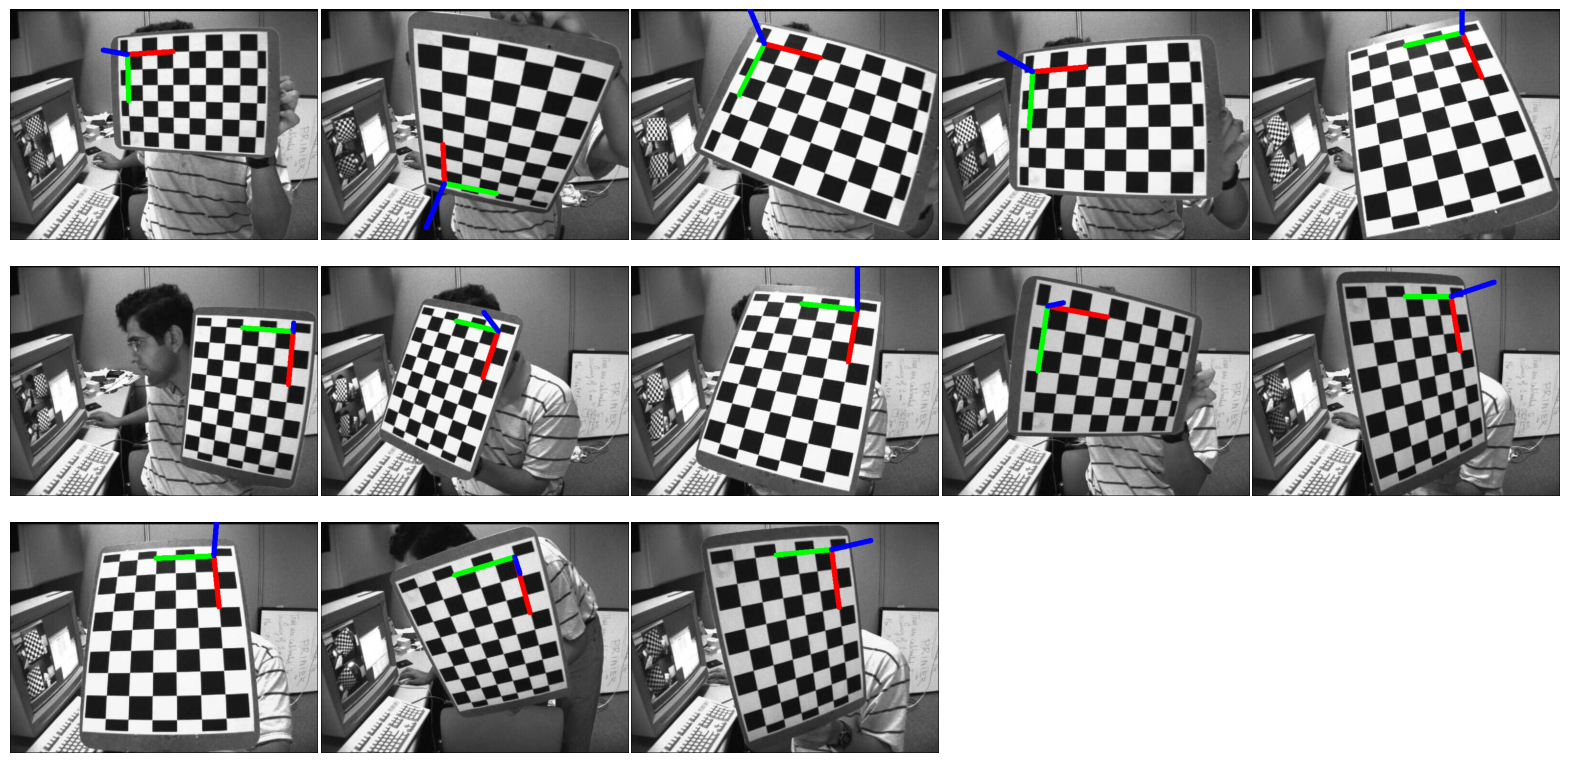

In [320]:
from matplotlib.gridspec import  GridSpec
print(len(axis_imgs))

nrows = 3
ncols = 5

fig = plt.figure(figsize = (20,10))
grid = GridSpec(nrows, ncols, wspace=0.01, hspace=0.0)

for i, img in enumerate(axis_imgs) :
  ax = plt.subplot(grid[i])
  ax.axis('off')
  ax.imshow(img)

## 추가 점수 과제

직접 찍은 체스 보드 이미지를 사용해 위 과정을 똑같이 수행한다.
  - 체스 보드는 첨부된 이미지(pattern.png), 직접 그린/다운로드한 이미지 등을 출력해 사용한다.

In [321]:
images = []
image_files = glob.glob(ROOT + 'IMG_*.png')
for f in image_files :
  img = cv.imread(f)
  images.append(img)

gray = cv.cvtColor(images[0], cv.COLOR_BGR2GRAY)
ret, cam_matrix, dist, rotation_vectors, translation_vectors = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [322]:
def draw(img, corners, imgpts):
    corner = tuple(corners[0].ravel().astype(int))
    img = cv.line(img, corner, tuple(imgpts[0].ravel().astype(int)), (255,0,0), 10)
    img = cv.line(img, corner, tuple(imgpts[1].ravel().astype(int)), (0,255,0), 10)
    img = cv.line(img, corner, tuple(imgpts[2].ravel().astype(int)), (0,0,255), 10)
    return img
    
axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)
axisBoxes = np.float32([[0,0,0], [0,3,0], [3,3,0], [3,0,0], [0,0,-3], [0,3,-3], [3,3,-3], [3,0,-3]])
axis_imgs = []

for img in images:
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    ret, corners = cv.findChessboardCorners(gray, (9, 6), None)

    if ret == True:
        corners2 = cv.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)

        # Find the rotation and translation vectors.
        ret, rvecs, tvecs = cv.solvePnP(objp, corners2, cam_matrix, dist)

        # project 3D points to image plane
        imgpts, jac = cv.projectPoints(axis, rvecs, tvecs, cam_matrix, dist)
        img = draw(img, corners2, imgpts)

    axis_imgs.append(img)
    

2


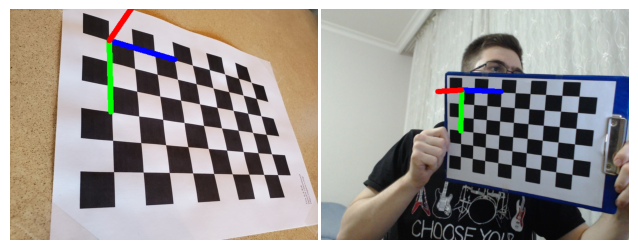

In [323]:
from matplotlib.gridspec import  GridSpec
print(len(axis_imgs))

nrows = 3
ncols = 5

fig = plt.figure(figsize = (20,10))
grid = GridSpec(nrows, ncols, wspace=0.01, hspace=0.0)

for i, img in enumerate(axis_imgs) :
  ax = plt.subplot(grid[i])
  ax.axis('off')
  ax.imshow(cv.cvtColor(img, cv.COLOR_RGB2BGR))